# Image_Multi

This notebook plots the first nine orbitals of a molecule or atom in a grid.

## Imports

Import all the libraries we need to get and display these images.

In [1]:
import webmo # to download the images
import matplotlib.pyplot as plt # to display the images

## User Setup

Get user input.

In [2]:
## BOOKKEEPING VALUES
# the URL of your WebMO instance
URL = "https://server.university.edu/~webmo/cgi-bin/webmo/rest.cgi"

# your WebMO username
uname = "smith"

# the job to look at (MO calculation of C atom)
job = 42

# If you want to save the resulting plot to a file, set this to the desired filename. Set to None to only display the plot.
outfile = "multi.png"

Start the REST session.

In [3]:
rest = webmo.WebMOREST(URL, username=uname)

Enter WebMO password for user smith: ········


## Display

Display the images in a $3 \times 3$ grid.

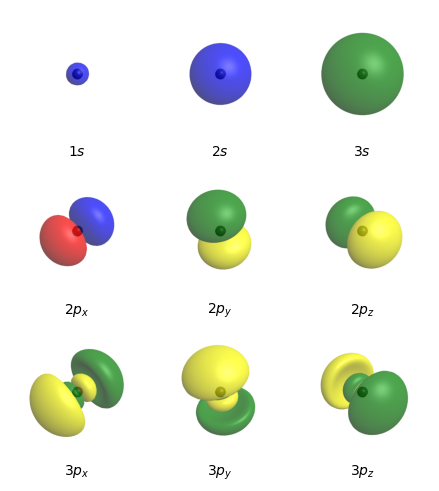

In [4]:
# correspond the labels with the correct MO # from WebMO (order depends on model chemistry)
labels   = [r"$1s$", r"$2s$", r"$3s$", r"$2p_x$", r"$2p_y$", r"$2p_z$", r"$3p_x$", r"$3p_y$", r"$3p_z$"]
orbitals = [1, 2, 7, 3, 4, 5, 6, 9, 8]

# start all the matplotlib shenanigans by defining the figure
fig, l = plt.subplots(3,3,layout='compressed')
plt.rcParams['text.usetex'] = True

# crop a flat percentage off around each image, which is defined here:
sq = 1000 # image size
p = .30 # percent total to crop
pc = int((sq * p) / 2) # percent off each edge

# loop over all triplets of (label, associated plot, MO #) and plot them
for (label, axis, orbital) in zip(labels, l.flatten(), orbitals):
    # grab the image from WebMO; rotate as desired
#    im = await rest.display_job_property(job, "mo", orbital, width=sq, height=sq, rotate=(0,0,0))
    im = await rest.display_job_property(job, "mo", orbital, width=sq, height=sq, rotate=(45,20,35))
    
    # convert it to pyllow and crop it
    im = im.to_pil_image()
    w,h = im.size
    im = im.crop((pc, pc, w-pc, h-pc))
    
    # and now, the final matplotlib shenanigans
    axis.imshow(im) # display image
    axis.set_xlabel(label) # set the label
    
    # matplotlib plot styling
    plt.setp(axis.get_yticklabels(), visible=False)
    plt.setp(axis.get_yticklines(),visible=False)
    plt.setp(axis.get_xticklabels(), visible=False)
    plt.setp(axis.get_xticklines(),visible=False)
    axis.spines[:].set_visible(False)
    
if outfile != None:
    plt.savefig(outfile, dpi=1200, bbox_inches='tight')